In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn, optim
from torchvision import datasets, transforms

import zipfile

import shutil
import os
import pandas as pd

device = ("cuda" if torch.cuda.is_available() else "cpu") # Use GPU or CPU for training

In [2]:
'''with zipfile.ZipFile("celeba.zip","r") as zip_ref:
  zip_ref.extractall("data_faces/")'''

'with zipfile.ZipFile("celeba.zip","r") as zip_ref:\n  zip_ref.extractall("data_faces/")'

In [3]:

root = '/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba'
img_list = os.listdir(root)
print(len(img_list))

202599


In [4]:

df = pd.read_csv("/home/luser/autoencoder_attacks/train_aautoencoders/list_attr_celeba.csv")
#df = df[['image_id', 'Smiling']]

In [5]:
df
#get all the row titles
df.index
# get all the column titles
df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [6]:
# to make directories

'''!rm -rf data
!mkdir data && mkdir data/smile && mkdir data/no_smile'''

'!rm -rf data\n!mkdir data && mkdir data/smile && mkdir data/no_smile'

In [20]:

s0 = 0
s1 = 0
s2 = 0
s3 = 0
s4 = 0
s5 = 0
s6 = 0
s7 = 0

num = 700000

for i, (_, i_row) in enumerate(df.iterrows()):
  '''if s0 < num: # for bald
    if i_row['Bald'] == 1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == 1 and i_row['Eyeglasses'] == -1:
      s0 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAbald/bald_disjoined/' + i_row['image_id'])
  
  if s1 < num: # for hat
    #if i_row['Wearing_Hat'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == 1 and i_row['No_Beard'] == 1 and i_row['Male'] == 1 and i_row['Eyeglasses'] == -1:
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_hat/Wearing_Hat_disjoined/' + i_row['image_id'])
  
  if s1 < num: # for beard
    #if i_row['No_Beard'] == -1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == -1 and i_row['Male'] == 1 and i_row['Eyeglasses'] == -1:
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAbeard/withBeard_disjoined/' + i_row['image_id'])

  if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Eyeglasses'] == 1 and i_row['Gray_Hair'] == 1  and i_row['Young'] == -1:
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebAblackWomenGlasses_d/black_women_eyeglass_disjoined/' + i_row['image_id'])

  if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Eyeglasses'] == 1 and i_row['Gray_Hair'] == 1  and i_row['Young'] == -1:
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebAoldWomenGlasses_d/old_women_eyeglass_disjoined/' + i_row['image_id'])'''

  '''if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Black_Hair'] == 1  and i_row['Pale_Skin'] == -1 and i_row['Big_Lips'] == 1 and i_row['Big_Nose'] == 1 and i_row['Wearing_Lipstick'] == 1 and i_row['Wearing_Earrings'] == 1:     
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_blackWomen_d/blackWomen_disjoined/' + i_row['image_id'])'''


  '''if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Pale_Skin'] == 1 and i_row['Eyeglasses'] == -1 and i_row['Blond_Hair'] == 1 :      
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_whiteWomen/whiteWomen_d/' + i_row['image_id'])'''


  '''if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Pale_Skin'] == 1 and i_row['Eyeglasses'] == -1 :      
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_generalWhiteWomen_d/generalWhiteWomen_disjoined/' + i_row['image_id'])'''


  '''if s1 < num: # black men
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Male'] == 1 and i_row['Black_Hair'] == 1  and i_row['Pale_Skin'] == -1 and i_row['Big_Lips'] == 1 and i_row['Big_Nose'] == 1 :     
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_blackMen_d/blackMen_disjoined/' + i_row['image_id'])'''

  '''if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Male'] == 1 and i_row['Pale_Skin'] == 1 :      
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_generalWhiteMen_d/generalWhiteMen_disjoined/' + i_row['image_id'])'''

  '''if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Young'] == 1 and i_row['Male'] == 1 :      
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d/youngMen_disjoined' + i_row['image_id'])

  if s2 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Young'] == 1 and i_row['Male'] == -1 :      
      s2 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d/youngWomen_disjoined/' + i_row['image_id'])

  if s3 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Young'] == -1 and i_row['Male'] == 1 and i_row['Gray_Hair'] == 1 :      
      s3 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d/oldMen_disjoined/' + i_row['image_id'])

  if s4 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Young'] == -1 and i_row['Male'] == -1 and i_row['Gray_Hair'] == 1:      
      s4 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d/oldWomen_disjoined/' + i_row['image_id'])'''


  if s0 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Black_Hair'] == 1  and i_row['Pale_Skin'] == -1 and i_row['Big_Lips'] == 1 and i_row['Big_Nose'] == 1 and i_row['Wearing_Lipstick'] == 1 and i_row['Wearing_Earrings'] == 1 and i_row['Wearing_Earrings'] == 1 and i_row['Young'] == 1 and i_row['Gray_Hair'] == -1 :     
      s0 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_youngblackWomen_d/youngblackWomen_disjoined/' + i_row['image_id'])

  if s1 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Black_Hair'] == 1  and i_row['Pale_Skin'] == -1 and i_row['Big_Lips'] == 1 and i_row['Big_Nose'] == 1 and i_row['Wearing_Lipstick'] == 1 and i_row['Wearing_Earrings'] == 1 and i_row['Wearing_Earrings'] == 1 and i_row['Young'] == -1 :     
      s1 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_oldblackWomen_d/oldblackWomen_disjoined/' + i_row['image_id'])

  if s2 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Pale_Skin'] == 1 and i_row['Eyeglasses'] == -1 and i_row['Young'] == 1 and i_row['Gray_Hair'] == -1 :      
      s2 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_younggeneralWhiteWomen_d/younggeneralWhiteWomen_disjoined/' + i_row['image_id'])


  if s3 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Bald'] == -1 and i_row['Wearing_Hat'] == -1 and i_row['No_Beard'] == 1 and i_row['Male'] == -1 and i_row['Pale_Skin'] == 1 and i_row['Eyeglasses'] == -1 and i_row['Young'] == -1 and i_row['Gray_Hair'] == 1 :      
      s3 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_oldgeneralWhiteWomen_d/oldgeneralWhiteWomen_disjoined/' + i_row['image_id'])

  if s4 < num: # black men
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Male'] == 1 and i_row['Black_Hair'] == 1  and i_row['Pale_Skin'] == -1 and i_row['Big_Lips'] == 1 and i_row['Big_Nose'] == 1 and i_row['Young'] == 1 and i_row['Gray_Hair'] == -1 :     
      s4 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_youngblackMen_d/youngblackMen_disjoined/' + i_row['image_id'])


  if s5 < num: # black men
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Male'] == 1 and i_row['Black_Hair'] == 1  and i_row['Pale_Skin'] == -1 and i_row['Big_Lips'] == 1 and i_row['Big_Nose'] == 1 and i_row['Young'] == -1 :     
      s5 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_oldblackMen_d/oldblackMen_disjoined/' + i_row['image_id'])


  if s6 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Male'] == 1 and i_row['Pale_Skin'] == 1 and i_row['Young'] == 1 and i_row['Gray_Hair'] == -1 :      
      s6 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_younggeneralWhiteMen_d/younggeneralWhiteMen_disjoined/' + i_row['image_id'])


  if s7 < num: # for female eye glasses
    #if i_row['Male'] == -1 and i_row['Eyeglasses'] == 1:
    if i_row['Male'] == 1 and i_row['Pale_Skin'] == 1 and i_row['Young'] == -1 and i_row['Gray_Hair'] == 1 :      
      s7 += 1
      shutil.copyfile('/home/luser/autoencoder_attacks/train_aautoencoders/data_faces/img_align_celeba/' + i_row['image_id'], '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized//celebA_oldgeneralWhiteMen_d/oldgeneralWhiteMen_disjoined/' + i_row['image_id'])


  if s0 == num and s1 == num and s2 == num and s3 == num and s4 == num  and s5 == num  and s6 == num  and s7 == num:
    break

In [39]:
#bald_list = os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAbald/bald')
bald_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAbald_d/bald_disjoined'
bald_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAbald_d/'
bald_list = os.listdir(bald_address)
#bald_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAbald/bald'))
print("Bald List: ", len(bald_list))


Bald List:  1819


In [41]:
#hat_addreess = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_hat/Wearing_Hat'
hat_addreess = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_hat_d/Wearing_Hat_disjoined'
hat_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_hat_d/'
hat_list = os.listdir(hat_addreess)
#hat_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/Wearing_Hat/'))
print("Hat List: ", len(hat_list))


Hat List:  2827


In [42]:
#beard_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAbeard/withBeard'
beard_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAbeard_d/withBeard_disjoined'
beard_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAbeard_d'
beard_list = os.listdir(beard_address)
#beard_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/withBeard/'))
print("Beard List: ", len(beard_list))


Beard List:  24707


In [85]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses_d/women_eyeglass_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))


female glass List:  2499


In [8]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAblackWomenGlasses_d/black_women_eyeglass_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAblackWomenGlasses_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  2394


In [8]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAoldWomenGlasses_d/old_women_eyeglass_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAoldWomenGlasses_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  145


In [10]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_blackWomen_d/blackWomen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_blackWomen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  1270


In [19]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_blackWomen_d/blackWomen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_blackWomen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  1270


In [7]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_whiteWomen_d/whiteWomen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_whiteWomen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  1966


In [8]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_generalWhiteWomen_d/generalWhiteWomen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_generalWhiteWomen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  6356


In [19]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_blackMen_d/blackMen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_blackMen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  3692


In [8]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_generalWhiteMen_d/generalWhiteMen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_generalWhiteMen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  2056


In [8]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_men_d/men_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_men_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  84434


In [21]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_women_d/women_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_women_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  118165


In [8]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_young_d/young_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_young_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  156734


In [20]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_old_d/old_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_old_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  45865


In [14]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d/youngMen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d'
femaleGlass_list = os.listdir(female_glass_parent)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  53448


In [11]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d/oldMen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  7003


In [12]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d/oldWomen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  1116


In [13]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d/youngWomen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  103287


In [8]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldblackMen_d/oldblackMen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldblackMen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))

female glass List:  778


In [21]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldblackWomen_d/oldblackWomen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldblackWomen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))


female glass List:  157


In [34]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldgeneralWhiteMen_d/oldgeneralWhiteMen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldgeneralWhiteMen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))


female glass List:  151


In [47]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldgeneralWhiteWomen_d/oldgeneralWhiteWomen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldgeneralWhiteWomen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))


female glass List:  93


In [59]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngblackMen_d/youngblackMen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngblackMen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))


female glass List:  2914


In [71]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngblackWomen_d/youngblackWomen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngblackWomen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))


female glass List:  1113


In [84]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_younggeneralWhiteMen_d/younggeneralWhiteMen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_younggeneralWhiteMen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))


female glass List:  1563


In [97]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_younggeneralWhiteWomen_d/younggeneralWhiteWomen_disjoined'
female_glass_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_younggeneralWhiteWomen_d'
femaleGlass_list = os.listdir(femaleGlass_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("female glass List: ", len(femaleGlass_list))


female glass List:  5654


In [98]:
transform = transforms.Compose([
          transforms.Resize((64, 64)),
          transforms.ToTensor()
          ])

batch_size = 64
celeba_data = datasets.ImageFolder(female_glass_parent, transform=transform)

In [99]:
#celeba_data = celeba_data_filtered

In [100]:
print(celeba_data.classes)
print(len(celeba_data))

considered_list = femaleGlass_list

['younggeneralWhiteWomen_disjoined']
5654


In [101]:

train_set, test_set = torch.utils.data.random_split(celeba_data, [int(len(considered_list) * 0.75), len(considered_list) - int(len(considered_list) * 0.75)])
train_data_size = len(train_set)
test_data_size = len(test_set)

In [102]:
trainLoader = torch.utils.data.DataLoader(train_set,batch_size=batch_size, shuffle=True)
testLoader  = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [103]:


print(train_data_size)
print(test_data_size)

4240
1414


In [104]:
for idx, (image, label) in enumerate(trainLoader):
    images, label = image.to(device), label.to(device)
    break

In [105]:
images.shape

torch.Size([64, 3, 64, 64])

In [107]:
#save the above images as torch tensors
torch.save(images, '/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/youngwhitewomen_d/images.pt')

In [108]:
#load the saved images
images = torch.load('/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/youngwhitewomen_d/images.pt')
images.shape

torch.Size([64, 3, 64, 64])

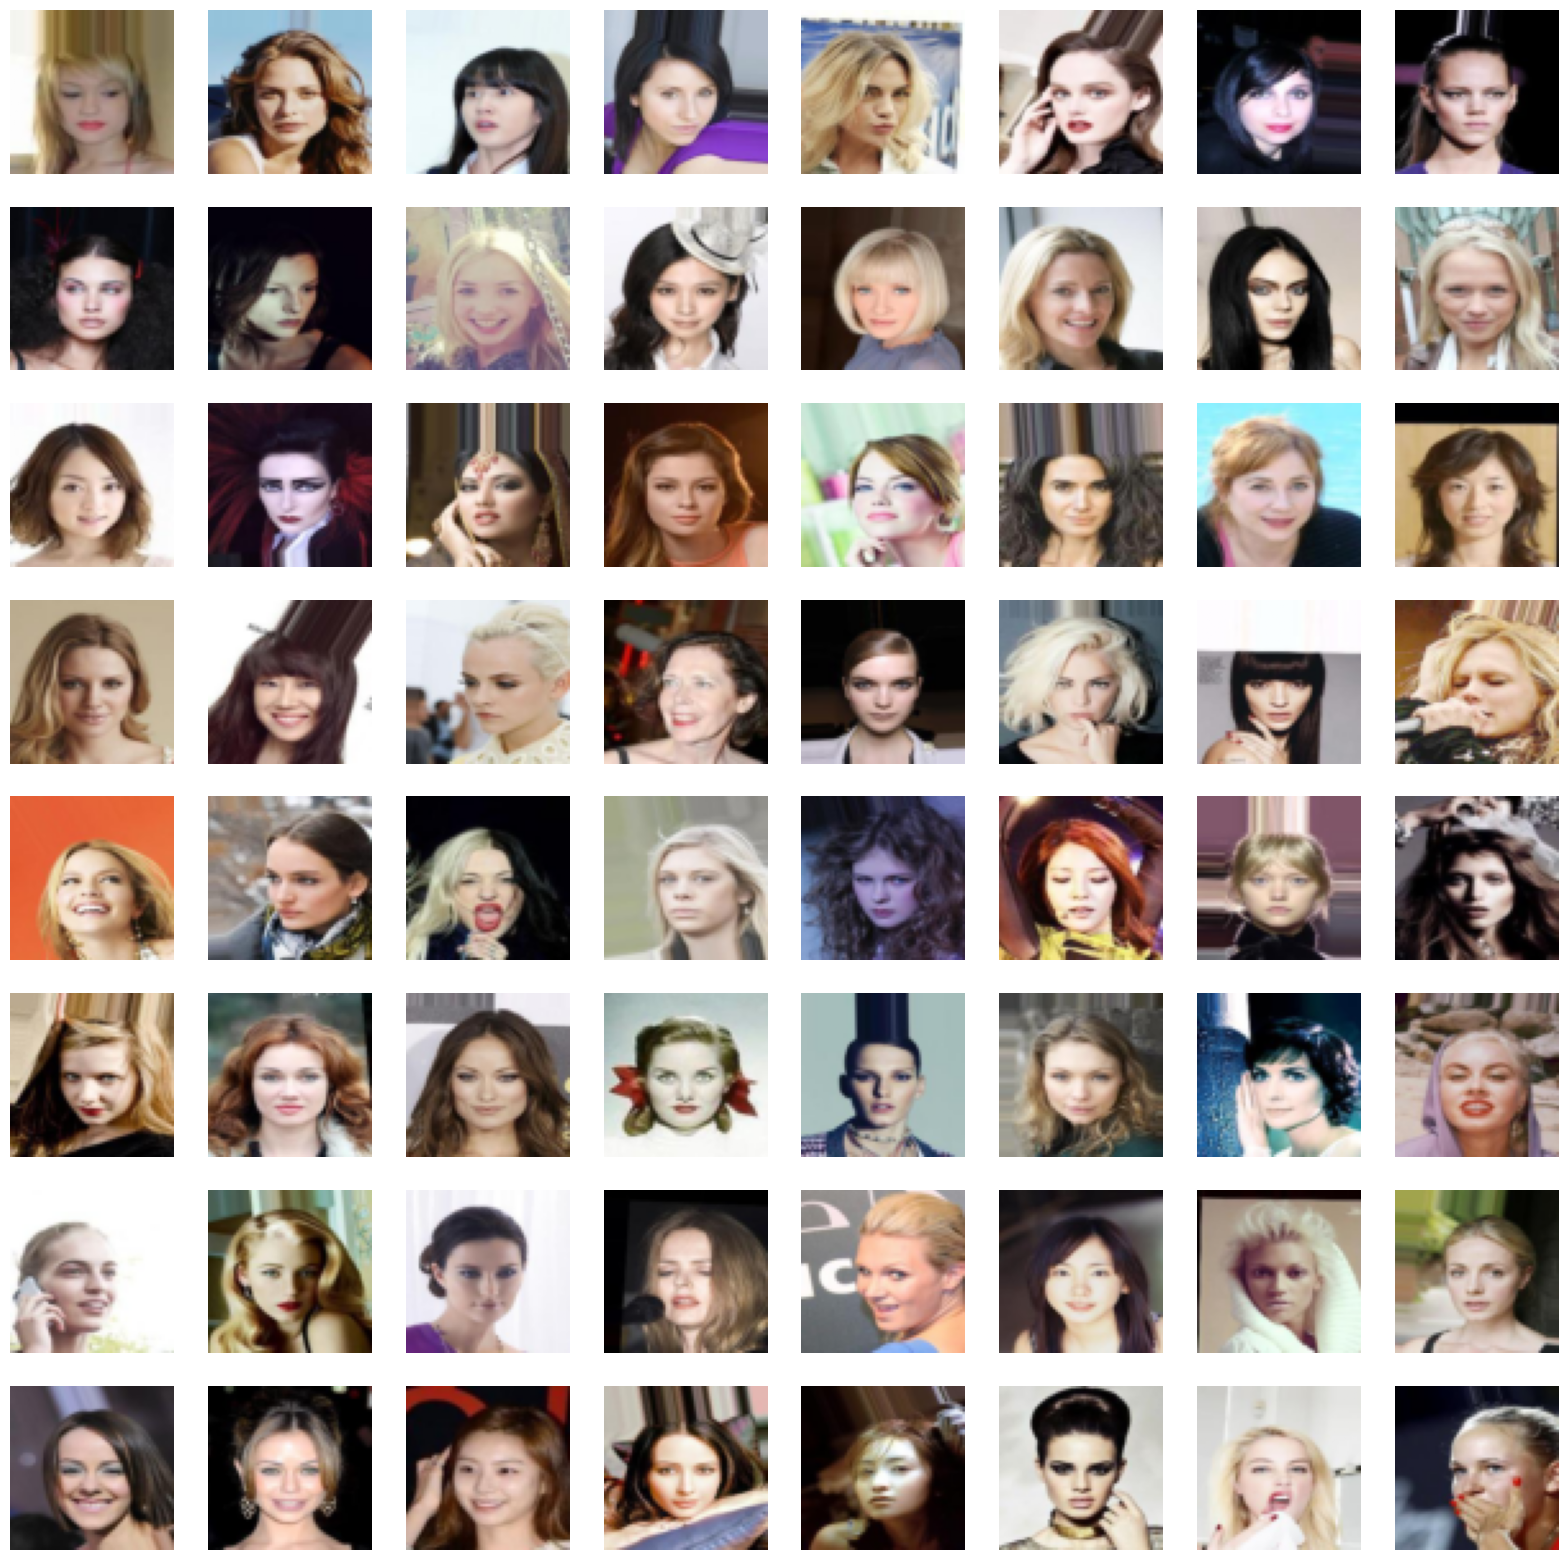

In [109]:
#plot the images
fig, ax = plt.subplots(8, 8, figsize=(20, 20))
for i in range(8):
    for j in range(8):
        ax[i, j].imshow(images[i*8+j].permute(1, 2, 0).cpu().numpy())
        ax[i, j].axis('off')

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from vae import VAE, VAE_big, VAE_big_layered

In [15]:
image_channels = 3

print('image_channels', image_channels)

#model = VAE(image_channels=image_channels).to(device)

model = VAE_big_layered(image_channels=image_channels).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4) 

image_channels 3


In [16]:
def loss_fn(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, size_average=False)
    KLD = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD, BCE, KLD

In [17]:
epochs = 200


In [18]:
train_loss = []

for epoch in range(epochs):
   
    total_train_loss = 0
    # training our model
    for idx, (image, label) in enumerate(trainLoader):
        images, label = image.to(device), label.to(device)

        recon_images, mu, logvar = model(images.to(device))
        loss, bce, kld = loss_fn(recon_images.to(device), images.to(device), mu.to(device), logvar.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    print('loss', loss)
    print("Epoch : ", epoch)


torch.save(model.state_dict(), '/home/luser/autoencoder_attacks/saved_celebA/celebA_CNN_VAE_big_layered_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch')

/home/luser/anaconda3/envs/inn/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loss tensor(259125.3438, device='cuda:0', grad_fn=<AddBackward0>)
Epoch :  0
loss tensor(250966.7344, device='cuda:0', grad_fn=<AddBackward0>)
Epoch :  1
loss tensor(252196.3125, device='cuda:0', grad_fn=<AddBackward0>)
Epoch :  2
loss tensor(245273.2500, device='cuda:0', grad_fn=<AddBackward0>)
Epoch :  3
loss tensor(243416.2500, device='cuda:0', grad_fn=<AddBackward0>)
Epoch :  4
loss tensor(254816.4062, device='cuda:0', grad_fn=<AddBackward0>)
Epoch :  5
loss tensor(250132.9219, device='cuda:0', grad_fn=<AddBackward0>)
Epoch :  6
loss tensor(248107.5156, device='cuda:0', grad_fn=<AddBackward0>)
Epoch :  7
loss tensor(252854.7500, device='cuda:0', grad_fn=<AddBackward0>)
Epoch :  8
loss tensor(244438.7188, device='cuda:0', grad_fn=<AddBackward0>)
Epoch :  9
loss tensor(229769.3438, device='cuda:0', grad_fn=<AddBackward0>)
Epoch :  10
loss tensor(240130.6562, device='cuda:0', grad_fn=<AddBackward0>)
Epoch :  11
loss tensor(234606.2500, device='cuda:0', grad_fn=<AddBackward0>)
Epoch : 

In [19]:
model = VAE_big_layered(image_channels=image_channels).to(device)


In [20]:
model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/celebA_CNN_VAE_big_layered_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))

# Set the model to evaluation mode (if needed)
model.eval()

VAE_big_layered(
  (encoder_6): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
  )
  (encoder_5): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (encoder_4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (encoder_3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (encoder_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
  )
  (encoder_1): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
  )
  (encoder_0): Sequential(
    (0): Conv2d(256, 256, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Flatten()
  )
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_feature

In [21]:
for idx, (image, label) in enumerate(trainLoader):
    images, label = image.to(device), label.to(device)
    break

In [22]:
recon_images, mu, logvar = model(images.to(device))


In [23]:
recon_images.shape

torch.Size([64, 3, 64, 64])

In [24]:
selected_ind = 7

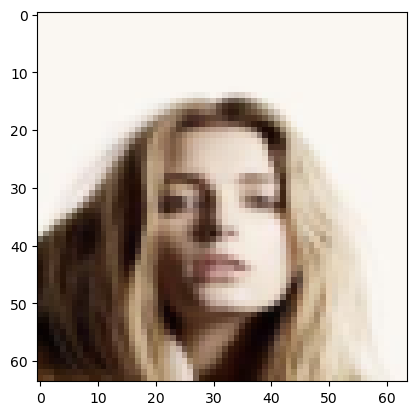

In [25]:
plt.imshow(images[selected_ind].permute(1, 2, 0).cpu().detach().numpy(), cmap=plt.cm.gray_r, interpolation='nearest')


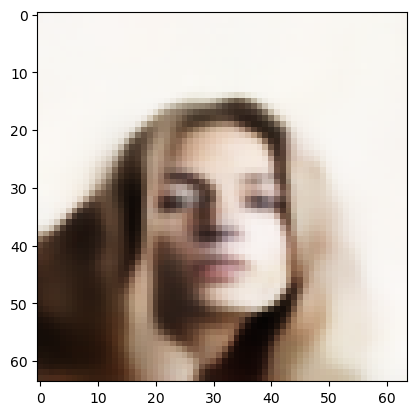

In [26]:
plt.imshow(recon_images[selected_ind].permute(1, 2, 0).cpu().detach().numpy(), cmap=plt.cm.gray_r, interpolation='nearest')
